<a href="https://colab.research.google.com/github/Wissg/Machine-learning/blob/main/project_alain_ghoudi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wissal GHOUDI, Victor ALAIN

# Import

We import some libraries.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests

We read each dataset as well as the description of the variables that we have.

In [ ]:
url = 'https://raw.githubusercontent.com/LeHoangViet03/Fintech-CYTech/main/Energy_Production_Test.csv'
test_data = pd.read_excel(url)

url1 = 'https://raw.githubusercontent.com/LeHoangViet03/Fintech-CYTech/main/Energy_Production_Train.csv'
train_data = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/LeHoangViet03/Fintech-CYTech/main/hourly_climate_specs_metric.txt'
description = requests.get(url2)

We display the description of those variables.

In [ ]:
print(description.text)

Specifications for Hourly Climate Information:
Last updated on 2-7-10

-------------------------------------------
Historical hourly information

(1) city location identifier (up to 9 alphanumeric characters)|
(2) observation time in UTC (String as YYYYMMDDhhmm)|
(3) observation time in LST (Local Standard Time) (String as YYYYMMDDhhmm)|
(4) observation time in local time (String as YYYYMMDDhhmm)|
(5) daylight status (Character - 'D' for daytime icons, 'N' for nighttime icons)|
(6) sky descriptor (Integer - see lookup)|
(7) precipitation descriptor (Integer - see lookup)|
(8) temperature descriptor (Integer - see lookup)|
(9) additional air descriptor (optional) (Integer - see lookup)|
(10) temperature (Floating Point - Celsius)|
(11) wind speed (Floating Point - km/hr.)|
(12) wind direction (Integer - compass degrees, 0 - 359, 0 == North)|
(13) wind gusts [optional] (Floating  Point - km/hr.)|
(14) humidity (Integer - percent)|
(15) dew point (Floating Point - Celsius)|
(16) comfort l

# Data description

We the description of our datas, which the maximum, minimum, the 25% quartile, the 75% quartile, the mean, the median of each features. It is used to compare them. However, we can't compare them here as they have not the same weight, we will use tools after to convert them into the same weight.

In [ ]:
train_data.describe()

,Plant_ID,Energy_Production,Benchmark,Temperature descriptor,Comfort level,Visibility,Probability of precipitation for last hour,Rainfall amount for last hour,Dew point,Temperature,Wind direction,Precipitation descriptor,Sky descriptor,Humidity,Wind speed
count,176505.000000,176505.000000,176505.00000,176505.000000,176505.000000,176505.000000,176505.000000,176505.000000,176505.000000,176505.000000,176505.000000,1.765050e+05,176505.000000,176505.000000,176505.000000
mean,7.731056,0.009563,0.00952,6.219943,12.226085,19.013074,12.133951,0.010837,6.998382,12.731229,140.857568,-4.380011e+06,9.754715,71.130178,7.590162
std,4.562745,0.015391,0.01537,2.003239,9.615682,8.684866,18.425581,0.041445,6.926009,8.626064,112.624672,9.688588e+07,4.742879,17.316067,2.646163
min,0.000000,0.000000,0.00000,3.000000,-10.240000,0.000000,0.000000,0.000000,-13.100000,-7.600000,0.000000,-2.147484e+09,1.000000,15.000000,0.160000
25%,4.000000,0.000000,0.00000,4.000000,4.660000,14.260000,2.000000,0.000000,1.900000,6.000000,38.000000,0.000000e+00,7.000000,58.000000,5.760000
50%,8.000000,0.000000,0.00000,6.000000,10.610000,19.200000,5.000000,0.000000,6.300000,11.300000,108.000000,0.000000e+00,8.000000,75.000000,7.200000
75%,12.000000,0.015000,0.01400,8.000000,19.300000,23.480000,10.000000,0.000000,13.000000,19.300000,224.000000,0.000000e+00,15.000000,86.000000,8.640000
max,15.000000,0.071000,0.07100,12.000000,39.840000,73.850000,84.000000,0.650000,22.700000,35.600000,359.000000,4.600000e+01,18.000000,99.000000,27.000000


We do the same with the test data. 

In [ ]:
test_data.describe()

,Plant_ID,Energy_Production,Benchmark,Temperature descriptor,Comfort level,Visibility,Probability of precipitation for last hour,Rainfall amount for last hour,Dew point,Temperature,Wind direction,Precipitation descriptor,Sky descriptor,Humidity,Wind speed
count,59376.000000,59376.000000,59376.000000,59376.000000,59376.00000,59376.000000,59376.000000,59376.000000,59376.000000,59376.000000,59376.000000,59376.000000,59376.000000,59376.000000,59376.000000
mean,7.491916,0.006078,0.006172,5.650330,9.48376,18.937514,5.523545,0.008468,6.194439,10.262901,151.681050,0.816155,9.066323,78.118769,6.981694
std,4.615500,0.011502,0.011550,1.690484,8.16070,8.966943,10.956142,0.037382,5.623385,7.329259,120.367775,3.048103,5.152275,14.566952,1.589293
min,0.000000,0.000000,0.000000,3.000000,-5.10000,0.000000,0.000000,0.000000,-5.300000,-2.500000,0.000000,0.000000,1.000000,27.000000,2.160000
25%,3.000000,0.000000,0.000000,4.000000,2.99000,13.860000,0.000000,0.000000,1.800000,4.300000,35.000000,0.000000,4.000000,71.000000,6.120000
50%,7.500000,0.000000,0.000000,6.000000,8.13000,18.700000,0.000000,0.000000,5.900000,8.900000,124.000000,0.000000,8.000000,82.000000,6.840000
75%,11.000000,0.006000,0.007000,6.000000,15.61000,22.700000,7.000000,0.000000,10.500000,15.600000,256.000000,0.000000,15.000000,89.000000,7.920000
max,15.000000,0.097000,0.097000,10.000000,30.15000,65.380000,68.000000,0.460000,19.700000,31.400000,359.000000,44.000000,18.000000,99.000000,16.560000


To get the number of values of each features for train_data and test_data. We can see that the train_data has more values than the test_data. 

In [ ]:
train_data.count()

UTC Time                                      176505
Plant_ID                                      176505
Energy_Production                             176505
Benchmark                                     176505
Day-Night                                     176505
Temperature descriptor                        176505
Comfort level                                 176505
Visibility                                    176505
Probability of precipitation for last hour    176505
Rainfall amount for last hour                 176505
Dew point                                     176505
Temperature                                   176505
Wind direction                                176505
Precipitation descriptor                      176505
Sky descriptor                                176505
Humidity                                      176505
Wind speed                                    176505
dtype: int64

In [ ]:
test_data.count()

UTC Time                                      59376
Plant_ID                                      59376
Energy_Production                             59376
Benchmark                                     59376
Day-Night                                     59376
Temperature descriptor                        59376
Comfort level                                 59376
Visibility                                    59376
Probability of precipitation for last hour    59376
Rainfall amount for last hour                 59376
Dew point                                     59376
Temperature                                   59376
Wind direction                                59376
Precipitation descriptor                      59376
Sky descriptor                                59376
Humidity                                      59376
Wind speed                                    59376
dtype: int64

It is important to notice here that for Plant_ID = 2, we don't have the same number of date as for the rest of the Plant_IDs.

In [ ]:
(train_data['Plant_ID'] == 2).sum()

4080

Here, we check the number of possible values for each features, we can see that for plant_ID there is 16 possible IDs. 

In [ ]:
for columns_i in train_data.columns:
  number_data = train_data[columns_i].nunique()
  print("{} : {}".format(columns_i, number_data))

UTC Time : 11495
Plant_ID : 16
Energy_Production : 72
Benchmark : 72
Day-Night : 2
Temperature descriptor : 9
Comfort level : 2601
Visibility : 2260
Probability of precipitation for last hour : 84
Rainfall amount for last hour : 55
Dew point : 360
Temperature : 404
Wind direction : 360
Precipitation descriptor : 21
Sky descriptor : 16
Humidity : 83
Wind speed : 88


## Data transformation

Here, we decide to convert Day-Night into dummies. It is important to do if we want to plot linear regression models. And we will get the result under the lign of code. We can see that we get a dataframe with two columns, one for Night and an other one for Day. As this is dummies, for night, the values is 1 if we are at night and 0 during the day. Same goes for the day, as we get 1 if we are during the day and 0 during the night. 

In [ ]:
train_data[['Night','Day']] = pd.get_dummies(train_data['Day-Night'],prefix='Day-Night',drop_first=False)
train_data[['Night','Day']]
test_data[['Night','Day']] = pd.get_dummies(test_data['Day-Night'],prefix='Day-Night',drop_first=False)
test_data[['Night','Day']]

,Night,Day
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
59371,0,1
59372,0,1
59373,0,1
59374,0,1


We decide to drop the column Day-Night as it is a string and we can't use it for regression models. We do the same with the column Night as Day and Night columns are almost the same (One is the opposite of the other). They give basically the same information in a similar way. We decide to keep only one of them, if we use the correlation matrix, we can see that they have the same absolute value, one is negative and the other is positive.  

In [ ]:
train_data = train_data.drop('Day-Night', axis = 1)
test_data = test_data.drop('Day-Night', axis = 1)
train_data = train_data.drop('Night', axis = 1)
test_data = test_data.drop('Night', axis = 1)

We decide to do the same with the UTC Time as it is an object we decide to transform this object into a date that we can read, then we create 4 columns, one for the day, one for the month, one for the year, and one for the hour. We compute the following lines to get those values. However, we will do this after as we still need the UTC Time. 

In [ ]:
#import datetime
#train_data['UTC Time'] = pd.to_datetime(train_data['UTC Time'])
#train_data['Jour'] = train_data['UTC Time'].dt.day
#train_data['Mois'] = train_data['UTC Time'].dt.month
#train_data['Annee'] = train_data['UTC Time'].dt.year
#train_data['Heure'] = train_data['UTC Time'].dt.hour

#train_data = train_data.drop('UTC Time', axis=1)

#test_data['UTC Time'] = pd.to_datetime(test_data['UTC Time'])
#test_data['Jour'] = test_data['UTC Time'].dt.day
#test_data['Mois'] = test_data['UTC Time'].dt.month
#test_data['Annee'] = test_data['UTC Time'].dt.year
#test_data['Heure'] = test_data['UTC Time'].dt.hour

#test_data = test_data.drop('UTC Time', axis=1)

As explained in the description of the variables above, here we decide to transform the temperature in Fahrenheit, we have them in Celsius. Same for Wind speed as we have them in km/h and we decide to have them in miles. It doesn't change much for the rest of our datas but we can still compute it. 

In [ ]:
train_data['Temperature'] = (train_data['Temperature']* 1.8) + 32.0
test_data['Temperature'] = (test_data['Temperature']* 1.8) + 32.0
train_data['Wind speed'] = 1.61 * train_data['Wind speed']
test_data['Wind speed'] = 1.61 * test_data['Wind speed']

Not really usefull, it is just to transform the WindDirection into string but we won't use it as we need float values to find the model that suits the best our data. 

In [ ]:
def winddirection_transformation(WindDirection):
    if (WindDirection <= 11 or WindDirection >= 349):
        return "N"
    elif (WindDirection < 34):
        return "NNE"
    elif (WindDirection < 56):
        return "NE"
    elif (WindDirection < 79):
        return "ENE"
    elif (WindDirection < 101):
        return "E"
    elif (WindDirection < 124):
        return "ESE"
    elif (WindDirection < 146):
        return "SE"
    elif (WindDirection < 169):
        return "SSE"
    elif (WindDirection < 191):
        return "S"
    elif (WindDirection < 214):
        return "SSW"
    elif (WindDirection < 236):
        return "SW"
    elif (WindDirection < 259):
        return "WSW"
    elif (WindDirection < 281):
        return "W"
    elif (WindDirection < 304):
        return "WNW"
    elif (WindDirection < 326):
        return "NW"
    elif (WindDirection < 349):
        return "NNW"

Here, it is a function that we will use to see if our target variable is stationnary or not. It is important to do it as the result won't be the same. In case of non-stationnarity, the NN might be a better model for example, which might not be the case here so it is important to get the nature of our data. Here is a test, the adfuller test, which will help us know if our data is stationnary or not. We can see that we have two hypothesis, one say that our target variable is stationnary and the other don't. We look towards the p-value and the value 0.05 (5%) to get the results. This means that for each Plant_ID, our target variable seems to have the same evolution. 

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data['Energy_Production'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.384896
p-value: 0.000000


Our serie is stationnary as p=0 so we reject the null hypothesis that our serie is non-stationnary.

In [ ]:
#train_data['Test'] = train_data['Wind direction'].apply(winddirection_transformation)
#dummies_Wind_direction = pd.get_dummies(train_data['Test'])

Here, we create Lagged_Values for our Energy_Production and we groupby Plant_ID to avoid problems with the Plant_ID. The goal is to have the values for each plant_ID and not have one the value for two different plant_IDs. We do the same with std that might help us have a better results when trying different models. The last two lines are here, because in our case, we shift(24) which means that the first three values will not have a correct value (NaN) so we correct it by filling it with null values to avoid any problems related to this. 

In [ ]:
train_data['Lagged_Values'] = train_data.groupby('Plant_ID')['Energy_Production'].shift(24)
train_data['Moving_Average'] = train_data.groupby('Plant_ID')['Energy_Production'].rolling(24).mean().reset_index(0, drop=True)
train_data['Std'] = train_data.groupby('Plant_ID')['Energy_Production'].rolling(24).std().reset_index(0, drop=True)
test_data['Lagged_Values'] = test_data.groupby('Plant_ID')['Energy_Production'].shift(24)
test_data['Moving_Average'] = test_data.groupby('Plant_ID')['Energy_Production'].rolling(24).mean().reset_index(0, drop=True)
test_data['Std'] = test_data.groupby('Plant_ID')['Energy_Production'].rolling(24).std().reset_index(0, drop=True)
train_data = train_data.ffill().bfill()
test_data = test_data.ffill().bfill()

Here, we will define our X_test, which will take into account different features, we will explained the choice of each of them later with the correlation matrix. y_test will take our target variable, which is the energy production. Before that we transformed our UTC Time into four different columns, hour, day, year and month, to see the importance of those values on the data. However, it is important to notice that we will take only into account the month, day and the hour as the year doesn't impact much the results and the impact on Energy_production is kinda random, and the month is probably the best to keep as the energy production is different each month of the year. We don't keep the hour as it is linked to the "day" that we created above, which means that during the day, the energy production is important compared to the night. At the end of it, we scaled our X_test in order to get the same weight for each variable, it is done to compare the variable between each others and used to test our models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#'Lagged_Feature','Moving_Average'
#'Temperature'
#'Mois'
#X_train = train_data[['Humidity','Day','Temperature','Plant_ID']]
#y_train = train_data['Energy_Production']

test_data['UTC Time'] = pd.to_datetime(test_data['UTC Time'])
test_data['Jour'] = test_data['UTC Time'].dt.day
test_data['Mois'] = test_data['UTC Time'].dt.month
test_data['Annee'] = test_data['UTC Time'].dt.year
test_data['Heure'] = test_data['UTC Time'].dt.hour

X_test = test_data[['Humidity', 'Heure', 'Temperature','Plant_ID','Mois','Lagged_Values','Moving_Average','Std','Jour']]
y_test = test_data['Energy_Production']

Theses lines of code are a bit more complicated to explain. First, we transform our column "UTC Time" from train_data into dates, which will allow us to get the day, month, year and hour as for the test_data. We want to create here an other test_data which is called validation_data and it will allows us to test our models and chose the best hyperparamaters for our models. The second line is not that really important as our dataset is by definition already sorted by Plant_ID and UTC Time. Then we decide to groupby Plant_ID as we want the result for all plant_ID. We then create the features that we talked about earlier, day, month, year, hour. After that, we create four empty tables, to get the values of X_train, y_train, X_val and y_val for each plant_ID. The first line in the loop is not really necessary too as we already have, for each plant_ID the result sorted by dates. TimeSeries is used to split our data into four splits. It is important to notice that this fonction doesn't shuffle our data so we are fine using it. Then, we get the index for validation and train and for each split to have the train_data_split and the val_data_split. Then we get these tables into the X_train, y_train, X_val and y_val, with the features that we want to use, to have all of them. We concatenate them to use the scaler right after, if not we can't use the scaler as we don't have the correct type of data. So we use th standardScaler to have the values into the same weight, which will be useless to test our models.  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
train_data['UTC Time'] = pd.to_datetime(train_data['UTC Time'])

#train_data = train_data.sort_values(by=['Plant_ID', 'UTC Time'])
groupby_plant = train_data.groupby('Plant_ID')

train_data['Jour'] = train_data['UTC Time'].dt.day
train_data['Mois'] = train_data['UTC Time'].dt.month
train_data['Annee'] = train_data['UTC Time'].dt.year
train_data['Heure'] = train_data['UTC Time'].dt.hour

X_train = []
X_val = []
y_train = []
y_val = []

for plant_data in groupby_plant: 
  train_data_plant = plant_data[1].sort_values(by=['UTC Time'])
  TimeSeries = TimeSeriesSplit(n_splits=4)
  for train_index, val_index in TimeSeries.split(train_data_plant):
    train_data_split = train_data_plant.iloc[train_index]
    val_data_split = train_data_plant.iloc[val_index]

    X_train.append(train_data_split[['Humidity', 'Heure', 'Temperature','Plant_ID','Mois','Lagged_Values','Moving_Average','Std','Jour']])
    y_train.append(train_data_split['Energy_Production'])
    X_val.append(val_data_split[['Humidity', 'Heure', 'Temperature','Plant_ID','Mois','Lagged_Values','Moving_Average','Std','Jour']])
    y_val.append(val_data_split['Energy_Production'])
    #print(X_train)
    #print(X_val)

X_train = np.concatenate(X_train)
X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)
y_train = np.concatenate(y_train)

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_val = scaler.fit_transform(X_val)
X_scaled_test = scaler.fit_transform(X_test)

col_names = ['Humidity', 'Heure', 'Temperature','Plant_ID','Mois','Lagged_Values','Moving_Average','Std','Jour']

X_train_scaled = pd.DataFrame(X_scaled_train,columns=[col_names])
X_val_scaled = pd.DataFrame(X_scaled_val,columns=[col_names])
X_test_scaled = pd.DataFrame(X_scaled_test,columns=[X_test.columns])

Here, we get the informations for each data, which means the name of each of them, the number of null, and the type of the values. We can see here after the transformations, that they are for most of them of type float64 or int64, exept for the Day column which is a binary variable. We decided to keep the column UTC Time into datatime, if we want to use it as an input we can't take it as we need to have floats so we need to convert or take the day, month, hour and year like we did before. 

In [ ]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176505 entries, 0 to 176504
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype              
---  ------                                      --------------   -----              
 0   UTC Time                                    176505 non-null  datetime64[ns, UTC]
 1   Plant_ID                                    176505 non-null  int64              
 2   Energy_Production                           176505 non-null  float64            
 3   Benchmark                                   176505 non-null  float64            
 4   Temperature descriptor                      176505 non-null  float64            
 5   Comfort level                               176505 non-null  float64            
 6   Visibility                                  176505 non-null  float64            
 7   Probability of precipitation for last hour  176505 non-null  float64            
 8   Rainfall amount for last

We get the correlation table between each variable. We will look only towards 'Energy_Production' as this is our target variable. Same for test_data but the results are really close. 

## Choice of features

In [ ]:
corr = train_data.corr() 
corr

,Plant_ID,Energy_Production,Benchmark,Temperature descriptor,Comfort level,Visibility,Probability of precipitation for last hour,Rainfall amount for last hour,Dew point,Temperature,...,Humidity,Wind speed,Day,Lagged_Values,Moving_Average,Std,Jour,Mois,Annee,Heure
Plant_ID,1.000000,0.067552,0.067990,0.001841,0.001428,-0.004354,0.002036,0.000272,0.004854,0.001486,...,0.005109,-0.006561,0.001360,0.067648,0.173631,0.210979,0.000937,0.017481,0.016916,-0.000004
Energy_Production,0.067552,1.000000,0.876011,0.467990,0.481825,0.395889,-0.115765,-0.069988,0.187473,0.488400,...,-0.649811,0.306496,-0.567628,0.894310,0.319294,0.314421,0.019473,0.004136,-0.055261,0.024432
Benchmark,0.067990,0.876011,1.000000,0.462456,0.478334,0.303756,-0.023874,-0.003170,0.217983,0.485070,...,-0.592963,0.319857,-0.565943,0.894743,0.360466,0.352709,0.023111,0.013921,-0.060830,0.023790
Temperature descriptor,0.001841,0.467990,0.462456,1.000000,0.954720,0.087639,0.025049,0.050691,0.832934,0.958439,...,-0.531722,0.210515,-0.325080,0.464578,0.573544,0.491502,0.023193,0.324552,-0.356566,0.142654
Comfort level,0.001428,0.481825,0.478334,0.954720,1.000000,0.089867,0.016943,0.043859,0.867855,0.996616,...,-0.548245,0.181506,-0.333363,0.480591,0.596463,0.511588,0.024385,0.336278,-0.373519,0.152223
Visibility,-0.004354,0.395889,0.303756,0.087639,0.089867,1.000000,-0.563152,-0.393927,-0.298848,0.095915,...,-0.681640,0.082980,-0.233034,0.345315,0.143998,0.165969,0.050932,-0.171352,0.020884,0.030266
Probability of precipitation for last hour,0.002036,-0.115765,-0.023874,0.025049,0.016943,-0.563152,1.000000,0.622571,0.188510,0.029439,...,0.267744,0.271051,-0.001193,-0.063257,-0.074729,-0.091971,-0.079411,0.103597,0.002600,-0.002865
Rainfall amount for last hour,0.000272,-0.069988,-0.003170,0.050691,0.043859,-0.393927,0.622571,1.000000,0.157078,0.052457,...,0.166451,0.206120,-0.013274,-0.028432,-0.007212,-0.023925,-0.092311,0.078175,-0.043220,0.018577
Dew point,0.004854,0.187473,0.217983,0.832934,0.867855,-0.298848,0.188510,0.157078,1.000000,0.864787,...,-0.076346,0.039836,-0.137663,0.202205,0.482158,0.393186,0.011545,0.448164,-0.417635,0.060399
Temperature,0.001486,0.488400,0.485070,0.958439,0.996616,0.095915,0.029439,0.052457,0.864787,1.000000,...,-0.558908,0.223713,-0.335760,0.487631,0.599760,0.514434,0.024012,0.328473,-0.367761,0.154254


We will only look towards the train_data as our models will be tested thanks to this model. We will look only at the correlation value between our target variable (Energy_Production) and all the features that we have. We will not take into account Benchmark as this value might influence negatively our results. The value close to 1 or -1 means that the correlation is strong between our target variable and the feature. We can see that Temperature descriptor and Comfort level have pretty high correlation, but we will not take them into account, as we will take the Temperature, which has approximatively the same correlation with our target variable. However Temperature is strongly correlated with both those features. We will also take 'Humidity' which is strongly correlated to our target value (above 0.5), same goes for 'Day'. We can make an argument for 'Visibility' and 'Wind speed', however, after testing them with the rest of the features that we will take, the results are worse. We will also take the three features that we created as they are highly correlated to our target variable. It is also important to notice that the results are worse if we take only two of them. 

In [ ]:
test_data.corr()

,Plant_ID,Energy_Production,Benchmark,Temperature descriptor,Comfort level,Visibility,Probability of precipitation for last hour,Rainfall amount for last hour,Dew point,Temperature,...,Humidity,Wind speed,Day,Lagged_Values,Moving_Average,Std,Jour,Mois,Annee,Heure
Plant_ID,1.000000e+00,0.081723,0.081458,-0.001977,-0.002297,-0.000187,-0.000245,0.000350,-0.002113,-0.002256,...,0.001283,-0.001077,0.000511,0.081335,0.207666,0.230530,-2.369402e-03,2.565481e-04,8.770874e-04,-4.704468e-17
Energy_Production,8.172346e-02,1.000000,0.812078,0.442040,0.480007,0.484475,-0.124277,-0.084039,0.201704,0.485903,...,-0.685510,0.191108,-0.529320,0.845917,0.297174,0.290624,-2.533297e-02,6.068738e-03,-7.472020e-02,5.326773e-02
Benchmark,8.145784e-02,0.812078,1.000000,0.440288,0.479137,0.415270,-0.061697,-0.016382,0.235651,0.486564,...,-0.623553,0.239661,-0.530530,0.857842,0.357699,0.349593,-5.271986e-02,2.191035e-02,-8.908907e-02,5.254139e-02
Temperature descriptor,-1.976910e-03,0.442040,0.440288,1.000000,0.938533,0.335498,0.013866,0.028457,0.851076,0.942899,...,-0.557699,0.248739,-0.251462,0.423267,0.513432,0.435715,-8.450637e-02,2.347013e-01,-4.351170e-01,1.139186e-01
Comfort level,-2.297081e-03,0.480007,0.479137,0.938533,1.000000,0.364829,0.001716,0.001340,0.890969,0.996603,...,-0.604247,0.214305,-0.290803,0.462936,0.536749,0.455086,-9.327009e-02,2.532630e-01,-4.615490e-01,1.190571e-01
Visibility,-1.872885e-04,0.484475,0.415270,0.335498,0.364829,1.000000,-0.510373,-0.350742,-0.020668,0.381751,...,-0.820281,0.065176,-0.279574,0.455290,0.388102,0.338270,-1.067337e-01,-1.086296e-01,1.385921e-02,5.371810e-02
Probability of precipitation for last hour,-2.453634e-04,-0.124277,-0.061697,0.013866,0.001716,-0.510373,1.000000,0.664901,0.185905,0.008915,...,0.320512,0.249749,0.037634,-0.096714,-0.141814,-0.125034,-6.537239e-02,2.072055e-01,-1.760984e-01,3.870475e-03
Rainfall amount for last hour,3.499200e-04,-0.084039,-0.016382,0.028457,0.001340,-0.350742,0.664901,1.000000,0.125056,0.014238,...,0.203825,0.334993,0.033061,-0.008919,-0.024235,-0.006187,-1.329834e-01,9.920924e-02,-8.210848e-02,8.588817e-03
Dew point,-2.112743e-03,0.201704,0.235651,0.851076,0.890969,-0.020668,0.185905,0.125056,1.000000,0.884181,...,-0.189387,0.186299,-0.113405,0.200035,0.429870,0.355062,-6.836002e-02,3.186317e-01,-5.124873e-01,6.644343e-02
Temperature,-2.255662e-03,0.485903,0.486564,0.942899,0.996603,0.381751,0.008915,0.014238,0.884181,1.000000,...,-0.617502,0.263242,-0.287712,0.469975,0.541311,0.458903,-1.024046e-01,2.509167e-01,-4.596878e-01,1.227406e-01


We display the heatmap of those correlation to have a better representation of them. We will the same results as explained before. 

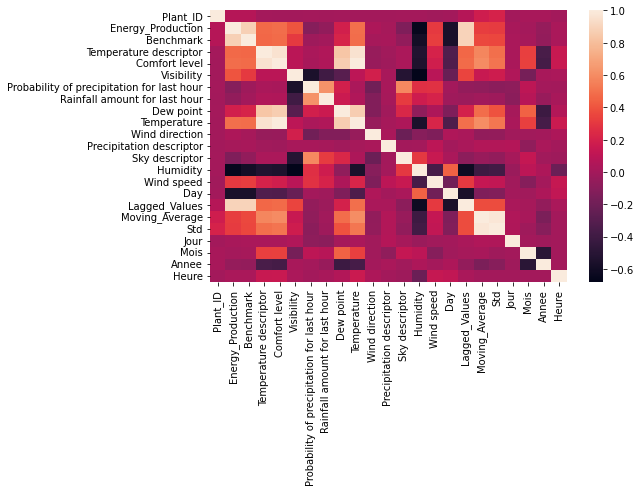

In [ ]:
import seaborn as sns #Import seaborn as sns is importing the Seaborn library, which is a visualization library
plt.figure(figsize=[8,5]) #Setting the size of the plot to 8 inches by 5 inches.
sns.heatmap(train_data.corr()) #Generate a heatmap from the correlation matrix
plt.show() #Displaying heatmap to visualize the correlations

We decide to see which features are strongly correlated to our target variable 'Energy_Production' (Absolute Correlation value should be above 0.5). The closer it is to 1 the better. 

In [ ]:
strong_corr_energy_prod = corr['Energy_Production'][abs(corr['Energy_Production']) > 0.5]
strong_corr_energy_prod

Energy_Production    1.000000
Benchmark            0.876011
Humidity            -0.649811
Day                 -0.567628
Lagged_Values        0.894310
Name: Energy_Production, dtype: float64

We try to identify missing values for each features, we can see here that we have no missing values for all of them. Same goes for the test_data.

In [ ]:
column_names = train_data.columns
for column in column_names:
  print('{}:{}'.format(column,str(train_data[column].isnull().sum()))) #We look towards the number of missing values, if the number of missing values is important then we will drop the features, if not, then we can replace missing values. 

UTC Time:0
Plant_ID:0
Energy_Production:0
Benchmark:0
Temperature descriptor:0
Comfort level:0
Visibility:0
Probability of precipitation for last hour:0
Rainfall amount for last hour:0
Dew point:0
Temperature:0
Wind direction:0
Precipitation descriptor:0
Sky descriptor:0
Humidity:0
Wind speed:0
Day:0
Lagged_Values:0
Moving_Average:0
Std:0
Jour:0
Mois:0
Annee:0
Heure:0


In [ ]:
column_names = test_data.columns
for column in column_names:
  print('{}:{}'.format(column,str(test_data[column].isnull().sum())))

UTC Time:0
Plant_ID:0
Energy_Production:0
Benchmark:0
Temperature descriptor:0
Comfort level:0
Visibility:0
Probability of precipitation for last hour:0
Rainfall amount for last hour:0
Dew point:0
Temperature:0
Wind direction:0
Precipitation descriptor:0
Sky descriptor:0
Humidity:0
Wind speed:0
Day:0
Lagged_Values:0
Moving_Average:0
Std:0
Jour:0
Mois:0
Annee:0
Heure:0


Text(0, 0.5, 'Mean of energy production')

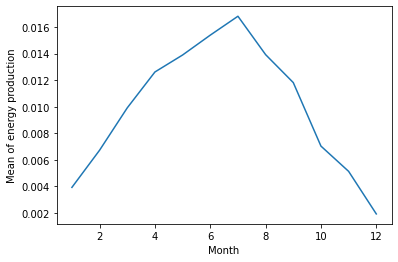

In [ ]:
fig = train_data.groupby('Mois')['Energy_Production'].mean()
plt.plot(fig.index, fig)
plt.xlabel("Month")
plt.ylabel("Mean of energy production")


Here we can see the mean of the energy production over the month, we can see that the energy production is the best around the summer period as the weather is way warmer than for the rest of the seasons, so the results seem fair. 

Text(0, 0.5, 'Mean of energy production')

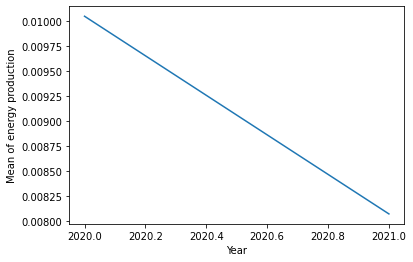

In [ ]:
fig = train_data.groupby('Annee')['Energy_Production'].mean()
plt.plot(fig.index, fig)
plt.xlabel("Year")
plt.ylabel("Mean of energy production")

Here, we can see that, the mean of the production is worth at the beginning of 2021 compared to the begining of 2020.

Text(0, 0.5, 'Mean of energy production')

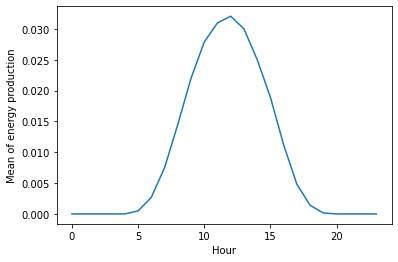

In [ ]:
fig = train_data.groupby('Heure')['Energy_Production'].mean()
plt.plot(fig.index, fig)
plt.xlabel("Hour")
plt.ylabel("Mean of energy production")

So here, it is also important as we can see that most of the energy is produced during the day, and not the night, that why we have the feature 'Day' correlated to our target variable. We can see that around 12:00, we have the best energy production. 

It is important here, to notice that Hour, Day, Year, Month are features that can be really important, because, as said before, for month, during the summer, the energy production will be higher as the weather is warmer compared to the rest of the seasons. For the variable hour, it is the same as we tend to produce more energy during the day so between 8h to around 20h. For the year, they might be bad year that may cause a drop in the energy production, for exemple years with less sunny days or natural events that may happen during a year and not during an other year. The day is a bit less important and a bit more random as for the values of Energy production.

Text(0, 0.5, 'Mean of energy production')

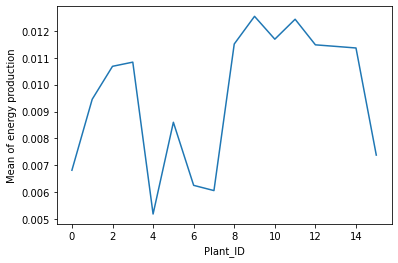

In [ ]:
fig = train_data.groupby('Plant_ID')['Energy_Production'].mean()
plt.plot(fig.index, fig)
plt.xlabel("Plant_ID")
plt.ylabel("Mean of energy production")

The Plant_ID is also an important features, that we might be taking into account even tho the correlation with our target variable is really weak. We can see that some plant produce more than others, for exemple the plant number 9 and 11 which produce the highest amount of energy.

# Finding the best model possible


##Linear

The first model that we will look at is the Linear regression model, we do exactly as we saw in class, we fit our model with the X_train_scaled and the y_train then we use the validation model to predict.

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [ ]:
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)

LinearRegression()

We get the coefficient of the linear model.

In [ ]:
linear.coef_

array([-2.52009952e-03, -6.42781029e-04,  1.12608646e-03,  8.48468719e-05,
       -1.40228172e-04,  1.22353086e-02, -5.20267484e-03,  5.05916906e-03,
       -1.74858345e-04])

In [ ]:
pd.DataFrame([linear.coef_], columns = col_names, index=['Linear'])

,Humidity,Heure,Temperature,Plant_ID,Mois,Lagged_Values,Moving_Average,Std,Jour
Linear,-0.00252,-0.000643,0.001126,0.000085,-0.00014,0.012235,-0.005203,0.005059,-0.000175


We also deal with neagtive values as we will replace by 0 instead. 

In [ ]:
y_pred = linear.predict(X_val_scaled)

pd.DataFrame([y_pred, y_val], index = ['Prediction', 'True value']).T

,Prediction,True value
0,0.006731,0.000
1,0.005102,0.000
2,0.003695,0.000
3,0.002854,0.000
4,0.003331,0.000
...,...,...
141199,0.001916,0.001
141200,0.000353,0.000
141201,-0.000292,0.000
141202,-0.000727,0.000


We get the R2_Score and the RMSE to see if our model suits our data or not. 

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
linear_r2=r2_score(y_val,y_pred)
print('R-squared:{:.3%}'.format(linear_r2))
linear_RMSE=mean_squared_error(y_val,y_pred,squared=False)
print('RMSE:{:.3f}'.format(linear_RMSE))

R-squared:82.104%
RMSE:0.007


We plot the predicted results with the true values. 

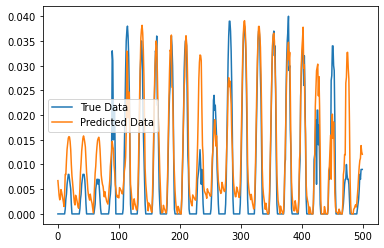

In [ ]:
y_pred = np.array(y_pred)
y_pred[y_pred < 0] = 0
y_pred = y_pred.tolist()

plt.plot(y_val[:500], label='True Data')
plt.plot(y_pred[:500], label='Predicted Data')
plt.legend()
plt.show()

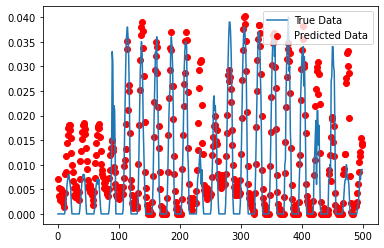

In [ ]:
plt.plot(y_val[:500], label='True Data')
plt.scatter(range(len(y_pred[:500])), y_pred[:500], label = 'Predicted Data', color = 'r')
plt.legend()
plt.show()

##Ridge

We do the same with ridge. We try the model with different parameters. 

In [ ]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train_scaled,y_train)

Ridge(alpha=0.001)

In [ ]:
ridge.coef_

array([-2.52009956e-03, -6.42781013e-04,  1.12608632e-03,  8.48468958e-05,
       -1.40228153e-04,  1.22353086e-02, -5.20267393e-03,  5.05916820e-03,
       -1.74858346e-04])

In [ ]:
y_pred = ridge.predict(X_val_scaled)

pd.DataFrame([y_pred, y_val], index = ['Prediction', 'True value']).T

,Prediction,True value
0,0.006731,0.000
1,0.005102,0.000
2,0.003695,0.000
3,0.002854,0.000
4,0.003331,0.000
...,...,...
141199,0.001916,0.001
141200,0.000353,0.000
141201,-0.000292,0.000
141202,-0.000727,0.000


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
ridge_r2=r2_score(y_val,y_pred)
print('R-squared:{:.3%}'.format(ridge_r2))
ridge_RMSE=mean_squared_error(y_val,y_pred,squared=False)
print('RMSE:{:.3f}'.format(ridge_RMSE))

R-squared:82.104%
RMSE:0.007


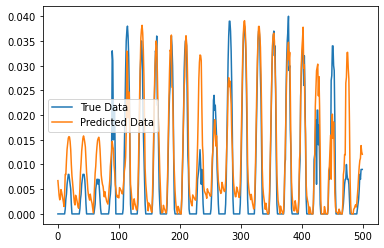

In [ ]:
y_pred = np.array(y_pred)
y_pred[y_pred < 0] = 0
y_pred = y_pred.tolist()

plt.plot(y_val[:500], label='True Data')
plt.plot(y_pred[:500], label='Predicted Data')
plt.legend()
plt.show()

We try ridge with different value of lambda. 

In [ ]:
lambda_list = [0,0.001,0.01,0.1,1]

r2_ridge_list = []
rmse_ridge_list=[]

for i in range(len(lambda_list)):
  ridge=Ridge(alpha=lambda_list[i])
  ridge.fit(X_train_scaled,y_train)

  ridge_prediction=ridge.predict(X_val_scaled)  
  rmse_ridge = mean_squared_error(y_val,ridge_prediction,squared=False)
  r2_ridge=r2_score(y_val,ridge_prediction)

  rmse_ridge_list.append(rmse_ridge)
  r2_ridge_list.append(r2_ridge)

  print('RMSE at lambda {}: {:.3f}'.format(lambda_list[i],rmse_ridge))
  print('R2 at alpha {}: {:.3%}'.format(lambda_list[i],r2_ridge))

RMSE at lambda 0: 0.007
R2 at alpha 0: 82.104%
RMSE at lambda 0.001: 0.007
R2 at alpha 0.001: 82.104%
RMSE at lambda 0.01: 0.007
R2 at alpha 0.01: 82.104%
RMSE at lambda 0.1: 0.007
R2 at alpha 0.1: 82.104%
RMSE at lambda 1: 0.007
R2 at alpha 1: 82.104%


We get the best result for ridge to compare the models between each other after. 

In [ ]:
best_R2_index=np.argmax(r2_ridge_list) 
best_R2_index_rmse = np.argmin(rmse_ridge_list)
max_R2_ridge=np.max(r2_ridge_list)
max_rmse_ridge = np.min(rmse_ridge_list)
best_alpha_ridge=lambda_list[best_R2_index]
print('Best alpha for ridge is {} with R2: {:.3%} and RMSE: {}'.format(best_alpha_ridge,max_R2_ridge, max_rmse_ridge))

Best alpha for ridge is 1 with R2: 82.104% and RMSE: 0.006697650581555024


##Lasso

Same goes for Lasso as we get the best value

In [ ]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=1e-05)

In [ ]:
y_pred = lasso.predict(X_val_scaled)
pd.DataFrame([y_pred, y_val], index = ['Prediction', 'True value']).T

,Prediction,True value
0,0.006724,0.000
1,0.005142,0.000
2,0.003773,0.000
3,0.002955,0.000
4,0.003440,0.000
...,...,...
141199,0.001876,0.001
141200,0.000328,0.000
141201,-0.000300,0.000
141202,-0.000725,0.000


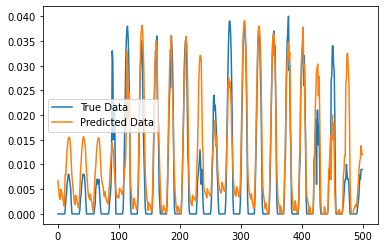

In [ ]:
y_pred = np.array(y_pred)
y_pred[y_pred < 0] = 0
y_pred = y_pred.tolist()
plt.plot(y_val[:500], label='True Data')
plt.plot(y_pred[:500], label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
lambda_list = [0.0000001,0.000001,0.00001,0.0001]
r2_lasso_list = []
rmse_lasso_list = []

for i in range(len(lambda_list)):
  lasso=Lasso(alpha=lambda_list[i])
  lasso.fit(X_train_scaled,y_train)

  lasso_prediction=lasso.predict(X_val_scaled)
  r2_lasso=r2_score(y_val,lasso_prediction)
  rmse_lasso = mean_squared_error(y_val,lasso_prediction,squared=False)

  r2_lasso_list.append(r2_lasso)
  rmse_lasso_list.append(rmse_lasso)

  print('RMSE at lambda {}: {:.3f}'.format(lambda_list[i],rmse_lasso))
  print('R2 at alpha {}: {:.3%}'.format(lambda_list[i],r2_lasso))

RMSE at lambda 1e-07: 0.007
R2 at alpha 1e-07: 82.104%
RMSE at lambda 1e-06: 0.007
R2 at alpha 1e-06: 82.107%
RMSE at lambda 1e-05: 0.007
R2 at alpha 1e-05: 82.125%
RMSE at lambda 0.0001: 0.007
R2 at alpha 0.0001: 81.939%


In [ ]:
best_R2_index=np.argmax(r2_lasso_list) 
best_R2_index_rmse = np.argmin(rmse_lasso_list)
max_R2_lasso=np.max(r2_lasso_list)
max_rmse_lasso = np.min(rmse_lasso_list)
best_alpha_lasso=lambda_list[best_R2_index]
print('Best alpha for lasso is {} with R2: {:.3%} and RMSE: {} '.format(best_alpha_lasso,max_R2_lasso, max_rmse_lasso))

Best alpha for lasso is 1e-05 with R2: 82.125% and RMSE: 0.0066937446177511815 


##Elastic Net

We try also elasticnet with different values of lambda and l1_ratio. 

In [ ]:
lambda_list = [0.000001,0.00001,0.0001]
l1_ratio=[0,0.5,1]

r2_elasticnet_list = []
rmse_elasticnet_list = []

for j in range(len(l1_ratio)):
  for i in range(len(lambda_list)):
    elasticnet=ElasticNet(alpha=lambda_list[i],l1_ratio=l1_ratio[j],max_iter=500)
    elasticnet.fit(X_train_scaled,y_train)

    elasticnet_prediction = elasticnet.predict(X_val_scaled)
    r2_elasticnet = r2_score(y_val,elasticnet_prediction)
    rmse_elasticnet = mean_squared_error(y_val,elasticnet_prediction,squared=False)

    r2_elasticnet_list.append(r2_elasticnet)
    rmse_elasticnet_list.append(rmse_elasticnet)

    print('RMSE at alpha and l1_ratio {} and {}: {:.3f}'.format(lambda_list[i],l1_ratio[j],rmse_elasticnet))
    print('R2 at alpha and l1_ratio {} and {}: {:.3%}'.format(lambda_list[i], l1_ratio[j], r2_elasticnet))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.382e+00, tolerance: 9.036e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


RMSE at alpha and l1_ratio 1e-06 and 0: 0.007
R2 at alpha and l1_ratio 1e-06 and 0: 82.104%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.382e+00, tolerance: 9.036e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


RMSE at alpha and l1_ratio 1e-05 and 0: 0.007
R2 at alpha and l1_ratio 1e-05 and 0: 82.104%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.386e+00, tolerance: 9.036e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


RMSE at alpha and l1_ratio 0.0001 and 0: 0.007
R2 at alpha and l1_ratio 0.0001 and 0: 82.105%
RMSE at alpha and l1_ratio 1e-06 and 0.5: 0.007
R2 at alpha and l1_ratio 1e-06 and 0.5: 82.105%
RMSE at alpha and l1_ratio 1e-05 and 0.5: 0.007
R2 at alpha and l1_ratio 1e-05 and 0.5: 82.116%
RMSE at alpha and l1_ratio 0.0001 and 0.5: 0.007
R2 at alpha and l1_ratio 0.0001 and 0.5: 82.075%
RMSE at alpha and l1_ratio 1e-06 and 1: 0.007
R2 at alpha and l1_ratio 1e-06 and 1: 82.107%
RMSE at alpha and l1_ratio 1e-05 and 1: 0.007
R2 at alpha and l1_ratio 1e-05 and 1: 82.125%
RMSE at alpha and l1_ratio 0.0001 and 1: 0.007
R2 at alpha and l1_ratio 0.0001 and 1: 81.939%


In [ ]:
best_R2_index=np.argmax(r2_elasticnet_list) 
best_R2_index_rmse = np.argmin(rmse_elasticnet_list)
max_R2_elasticnet=np.max(r2_elasticnet_list)
i=3
while best_R2_index-i > 3: 
  i = i*2
best_alpha_elasticnet=lambda_list[best_R2_index-i]
max_rmse_elasticnet = np.min(rmse_elasticnet_list)
best_l1_ratio = l1_ratio[int(best_R2_index/3)]
print('Best alpha and l1_ratio for elasticnet is {} and {} with R2: {:.3%} and RMSE: {} '.format(best_alpha_elasticnet,best_l1_ratio,max_R2_elasticnet, max_rmse_elasticnet))

Best alpha and l1_ratio for elasticnet is 1e-05 and 1 with R2: 82.125% and RMSE: 0.0066937446177511815 


##Decision Tree

We try also decision_tree with different hyperparameters that we will see after. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=13)
decision_tree.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=13)

In [ ]:
y_pred = decision_tree.predict(X_val_scaled)
pd.DataFrame([y_pred, y_val], index = ['Prediction', 'True value']).T

,Prediction,True value
0,0.000000,0.000
1,0.000000,0.000
2,0.000000,0.000
3,0.000000,0.000
4,0.000000,0.000
...,...,...
141199,0.000839,0.001
141200,0.000000,0.000
141201,0.000000,0.000
141202,0.000000,0.000


In [ ]:
from sklearn.metrics import r2_score
decision_tree_r2=r2_score(y_val,y_pred)
print('R-squared:{:.3%}'.format(decision_tree_r2))
decision_tree_RMSE=mean_squared_error(y_val,y_pred,squared=False)
print('RMSE:{:.3f}'.format(decision_tree_RMSE))

R-squared:91.333%
RMSE:0.005


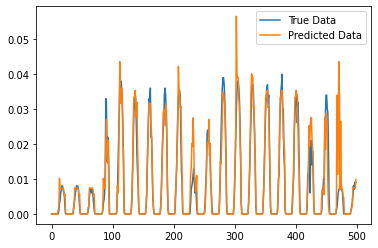

In [ ]:
y_pred = np.array(y_pred)
y_pred[y_pred < 0] = 0
y_pred = y_pred.tolist()
plt.plot(y_val[:500], label='True Data')
plt.plot(y_pred[:500], label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
depth_list=[9,10,11,12,13,14,15]

r2_decision_tree_list = []
rmse_decision_tree_list = []

for depth_i in depth_list: 
  decision_tree=DecisionTreeRegressor(max_depth=depth_i)
  decision_tree.fit(X_train_scaled,y_train)

  y_pred=decision_tree.predict(X_val_scaled)
  r2_decision_tree=r2_score(y_val,y_pred)
  rmse_decision_tree=mean_squared_error(y_val,y_pred,squared=False)

  r2_decision_tree_list.append(r2_decision_tree)
  rmse_decision_tree_list.append(rmse_decision_tree)

  print('RMSE at depth {}: {:.3f}'.format(depth_i,rmse_decision_tree))
  print('R2 at depth {}: {:.3%}'.format(depth_i,r2_decision_tree))

RMSE at depth 9: 0.005
R2 at depth 9: 90.560%
RMSE at depth 10: 0.005
R2 at depth 10: 90.931%
RMSE at depth 11: 0.005
R2 at depth 11: 91.514%
RMSE at depth 12: 0.005
R2 at depth 12: 91.253%
RMSE at depth 13: 0.005
R2 at depth 13: 91.208%
RMSE at depth 14: 0.005
R2 at depth 14: 91.316%
RMSE at depth 15: 0.005
R2 at depth 15: 91.220%


In [ ]:
best_R2_index=np.argmax(r2_decision_tree_list) 
best_R2_index_rmse = np.argmin(rmse_decision_tree_list)
max_R2_decision_tree=np.max(r2_decision_tree_list)
max_rmse_decision_tree=np.min(rmse_decision_tree_list)
best_depth_decision_tree=depth_list[best_R2_index]
print('Best depth for decision tree is {} with R2: {:.3%} and RMSE: {}'.format(best_depth_decision_tree,max_R2_decision_tree, max_rmse_decision_tree))

Best depth for decision tree is 11 with R2: 91.514% and RMSE: 0.004611972661870124


In [ ]:
R2_models = pd.DataFrame([max_R2_decision_tree * 100], columns = ['R2_score'], index = ['Decision Tree'])

In [ ]:
R2_models.T

,Decision Tree
R2_score,91.514425


##Random Forest

Same with random forest, we will try different hyperparameters to get the best result possible. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg=RandomForestRegressor(n_estimators=9,max_depth=15)
rf_reg.fit(X_train_scaled,y_train)

rf_prediction=rf_reg.predict(X_val_scaled)

In [ ]:
pd.DataFrame([rf_prediction, y_val], index = ['Prediction', 'True value']).T

,Prediction,True value
0,0.000007,0.000
1,0.000000,0.000
2,0.000000,0.000
3,0.000000,0.000
4,0.000000,0.000
...,...,...
141199,0.001047,0.001
141200,0.000000,0.000
141201,0.000000,0.000
141202,0.000000,0.000


In [ ]:
from sklearn.metrics import r2_score
rf_r2=r2_score(y_val,rf_prediction)
print('R-squared:{:.3%}'.format(rf_r2))
rf_RMSE=mean_squared_error(y_val,rf_prediction,squared=False)
print('RMSE:{:.3f}'.format(rf_RMSE))

R-squared:94.623%
RMSE:0.004


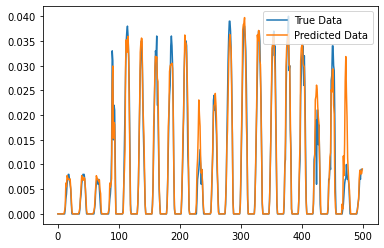

In [ ]:
rf_prediction = np.array(rf_prediction)
rf_prediction[rf_prediction < 0] = 0
rf_prediction = rf_prediction.tolist()
plt.plot(y_val[:500], label='True Data')
plt.plot(rf_prediction[:500], label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
depth_list=[9,10,11,12,13,14,15]
n_estimators_list = [1,2,3,4,5,6,7,8,9]

r2_rf_list=[]
rmse_rf_list = []

for depth_i in depth_list:
  for n_estimators_i in n_estimators_list: 
    rf=RandomForestRegressor(n_estimators = n_estimators_i, max_depth=depth_i)
    rf.fit(X_train_scaled,y_train)

    y_pred=rf.predict(X_val_scaled)
    y_pred = np.array(y_pred)
    y_pred[y_pred < 0] = 0
    y_pred = y_pred.tolist()
    r2_rf=r2_score(y_val,y_pred)
    rmse_rf=mean_squared_error(y_val,y_pred,squared=False)

    r2_rf_list.append(r2_rf)
    rmse_rf_list.append(rmse_rf)

    print('RMSE at depth {} and number of estimators {}: {:.3f}'.format(depth_i,n_estimators_i, rmse_rf))
    print('R2 at depth {} and number of estimators {}: {:.3%}'.format(depth_i,n_estimators_i, r2_rf))

RMSE at depth 9 and number of estimators 1: 0.005
R2 at depth 9 and number of estimators 1: 90.695%
RMSE at depth 9 and number of estimators 2: 0.005
R2 at depth 9 and number of estimators 2: 91.410%
RMSE at depth 9 and number of estimators 3: 0.005
R2 at depth 9 and number of estimators 3: 91.570%
RMSE at depth 9 and number of estimators 4: 0.005
R2 at depth 9 and number of estimators 4: 91.866%
RMSE at depth 9 and number of estimators 5: 0.004
R2 at depth 9 and number of estimators 5: 91.969%
RMSE at depth 9 and number of estimators 6: 0.004
R2 at depth 9 and number of estimators 6: 92.000%
RMSE at depth 9 and number of estimators 7: 0.004
R2 at depth 9 and number of estimators 7: 91.944%
RMSE at depth 9 and number of estimators 8: 0.004
R2 at depth 9 and number of estimators 8: 91.945%
RMSE at depth 9 and number of estimators 9: 0.004
R2 at depth 9 and number of estimators 9: 91.963%
RMSE at depth 10 and number of estimators 1: 0.005
R2 at depth 10 and number of estimators 1: 91.295

In [ ]:
best_R2_index=np.argmax(r2_rf_list) 
max_R2_rf=np.max(r2_rf_list)
best_rmse_index=np.argmin(rmse_rf_list) 
max_rmse_rf=np.min(rmse_rf_list)
best_R2_index_depth = int(best_R2_index/9) 
best_depth_rf=depth_list[best_R2_index_depth]
i = 9
while best_R2_index-i > 9: 
  i = i*2
best_estimators_rf=n_estimators_list[best_R2_index-i+18]
print('Best depth and number of estimators for decision tree are {} and {} with R2: {:.3%} and RMSE: {}'.format(best_depth_rf, best_estimators_rf,max_R2_rf, max_rmse_rf))

Best depth and number of estimators for decision tree are 15 and 9 with R2: 94.528% and RMSE: 0.003703692905403339


In [ ]:
R2_models = pd.DataFrame([max_R2_decision_tree * 100, max_R2_rf * 100], columns = ['R2_score'], index = ['Decision Tree', 'Random forest'])

In [ ]:
R2_models.T

,Decision Tree,Random forest
R2_score,91.514425,94.527601


##KNN

We do the same with KNN, and we take different value of neightbors and distance to see the different results and we take the best one. The results that we have seem be odd. However, when looking our data, it feels like we might be in a situation of overfitting, or the complexity of our model is too high. 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=7, p=1)
knn.fit(X_train_scaled,y_train)

y_pred=knn.predict(X_val_scaled)

In [ ]:
pd.DataFrame([y_pred, y_val], index = ['Prediction', 'True value']).T

,Prediction,True value
0,0.000000,0.000
1,0.000000,0.000
2,0.000000,0.000
3,0.000000,0.000
4,0.000000,0.000
...,...,...
141199,0.001857,0.001
141200,0.000000,0.000
141201,0.000000,0.000
141202,0.000000,0.000


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
knn_r2=r2_score(y_val,y_pred)
print('R-squared:{:.3%}'.format(knn_r2))
knn_RMSE=mean_squared_error(y_val,y_pred,squared=False)
print('RMSE:{:.3f}'.format(knn_RMSE))

R-squared:94.870%
RMSE:0.004


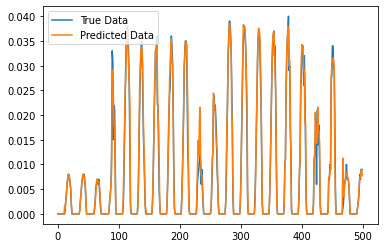

In [ ]:
y_pred = np.array(y_pred)
y_pred[y_pred < 0] = 0
y_pred = y_pred.tolist()
plt.plot(y_val[:500], label='True Data')
plt.plot(y_pred[:500], label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
neighbors_list=[3,5,7,9,11,13,15]
distance_list = [1, 2]

r2_knn_list=[]
rmse_knn_list=[]

for neighbors_i in neighbors_list:
  for distance_i in distance_list: 
    knn=KNeighborsRegressor(n_neighbors=neighbors_i, p = distance_i)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_val_scaled)

    r2_knn=r2_score(y_val,y_pred)
    rmse_knn=mean_squared_error(y_val,y_pred,squared=False)

    r2_knn_list.append(r2_knn)
    rmse_knn_list.append(rmse_knn)

    print('RMSE at neighbors {} and distance {}: {}'.format(neighbors_i,distance_i,rmse_knn))
    print('R2 at neighbors {} and distance {}: {:.3%}'.format(neighbors_i,distance_i,r2_knn))

RMSE at neighbors 3 and distance 1: 0.0033851635532211512
R2 at neighbors 3 and distance 1: 95.428%
RMSE at neighbors 3 and distance 2: 0.003947102439638347
R2 at neighbors 3 and distance 2: 93.785%
RMSE at neighbors 5 and distance 1: 0.003509634785902312
R2 at neighbors 5 and distance 1: 95.086%
RMSE at neighbors 5 and distance 2: 0.003965635578931253
R2 at neighbors 5 and distance 2: 93.726%
RMSE at neighbors 7 and distance 1: 0.0035858432047567892
R2 at neighbors 7 and distance 1: 94.870%
RMSE at neighbors 7 and distance 2: 0.004016645513528744
R2 at neighbors 7 and distance 2: 93.564%
RMSE at neighbors 9 and distance 1: 0.0036452399334066183
R2 at neighbors 9 and distance 1: 94.699%
RMSE at neighbors 9 and distance 2: 0.004062056869405799
R2 at neighbors 9 and distance 2: 93.417%
RMSE at neighbors 11 and distance 1: 0.003671012489834766
R2 at neighbors 11 and distance 1: 94.624%
RMSE at neighbors 11 and distance 2: 0.00407913718574612
R2 at neighbors 11 and distance 2: 93.362%
RMSE

In [ ]:
best_R2_index=np.argmax(r2_knn_list) 
best_R2_RMSE = np.argmin(rmse_knn_list)
max_R2_knn=np.max(r2_knn_list)
max_rmse=np.min(rmse_knn_list)
best_R2_index_neighbors = int(best_R2_index/2) 
best_neighbors=neighbors_list[int(best_R2_index_neighbors)]
if best_R2_index%2 == 0:
  best_distance=1
else:
  best_distance = 2
print('Best neighbors and distance for KNN are {} and {} with R2: {:.3%} and RMSE: {}'.format(best_neighbors,best_distance,max_R2_knn,max_rmse))

Best neighbors and distance for KNN are 3 and 1 with R2: 95.428% and RMSE: 0.0033851635532211512


##Support Vector Machine

We do the same for Support Vector Machine. Here we can see that the value of the model is negative, which seems wrong but it just means that, since we have a large dataset, our model fails to converge. 

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
svr=SVR(kernel='rbf', C=10, gamma=1, epsilon=1)
svr.fit(X_train_scaled, y_train)
y_pred=svr.predict(X_val_scaled)

In [ ]:
pd.DataFrame([y_pred, y_val], index = ['Prediction', 'True value']).T

,Prediction,True value
0,0.0355,0.000
1,0.0355,0.000
2,0.0355,0.000
3,0.0355,0.000
4,0.0355,0.000
...,...,...
141199,0.0355,0.001
141200,0.0355,0.000
141201,0.0355,0.000
141202,0.0355,0.000


In [ ]:
svr_r2=r2_score(y_val,y_pred)
print('R-squared:{:.3%}'.format(svr_r2))
svr_RMSE=mean_squared_error(y_val,y_pred,squared=False)
print('RMSE:{:.3f}'.format(svr_RMSE))

R-squared:-257.974%
RMSE:0.030


In [ ]:
gamma_list=[0.100,0.01000,0.0010000,1]

r2_svr_list = []
rmse_svr_list=[]

for gamma_i in gamma_list:
  svr=SVR(kernel='rbf', gamma = gamma_i, C = 0.01,epsilon = 0.5)
  svr.fit(X_train_scaled,y_train)

  y_pred=svr.predict(X_val_scaled)
  r2_svr=r2_score(y_val,y_pred)
  rmse_svr=mean_squared_error(y_val,y_pred,squared=False)

  r2_svr_list.append(r2_svr)
  rmse_svr_list.append(rmse_svr)

  print('RMSE at gamma {}: {}'.format(gamma_i,rmse_svr))
  print('R2 at gamma {}: {:.3%}'.format(gamma_i,r2_svr))

RMSE at gamma 0.1: 0.029955178716441332
R2 at gamma 0.1: -257.974%
RMSE at gamma 0.01: 0.029955178716441332
R2 at gamma 0.01: -257.974%
RMSE at gamma 0.001: 0.029955178716441332
R2 at gamma 0.001: -257.974%
RMSE at gamma 1: 0.029955178716441332
R2 at gamma 1: -257.974%


After testing with different kernel (poly, linear and rbf) and hyperparameters, the results are still the same. 

##XGB

We do the same with xgboost, which is using a gradient. 

In [ ]:
from xgboost import XGBRegressor

In [ ]:
rf_reg=XGBRegressor(max_depth=12,n_estimators=24)
rf_reg.fit(X_train_scaled,y_train)

rf_prediction=rf_reg.predict(X_val_scaled)

In [ ]:
xgb_r2=r2_score(y_val,rf_prediction)
print('R-squared:{:.3%}'.format(xgb_r2))
xgb_RMSE=mean_squared_error(y_val,rf_prediction,squared=False)
print('RMSE:{:.3f}'.format(xgb_RMSE))

R-squared:94.023%
RMSE:0.004


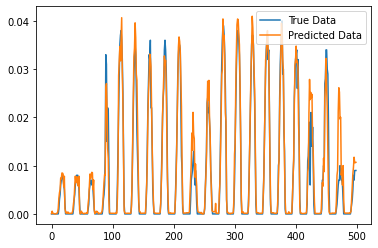

In [ ]:
rf_prediction = np.array(rf_prediction)
rf_prediction[rf_prediction < 0] = 0
rf_prediction = rf_prediction.tolist()
plt.plot(y_val[:500], label='True Data')
plt.plot(rf_prediction[:500], label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
depth_list=[7,8,9,10,11,12]
n_estimators_list = [21,22,23,24,25]

r2_xgb_list=[]
rmse_xgb_list = []

for depth_i in depth_list:
  for n_estimators_i in n_estimators_list: 
    rf_reg=XGBRegressor(n_estimators = n_estimators_i, max_depth=depth_i)
    rf_reg.fit(X_train_scaled,y_train)

    y_pred=rf_reg.predict(X_val_scaled)
    r2_rf_reg=r2_score(y_val,y_pred)
    rmse_rf_reg=mean_squared_error(y_val,y_pred,squared=False)

    r2_xgb_list.append(r2_rf_reg)
    rmse_xgb_list.append(rmse_rf_reg)

    print('RMSE at depth {} and number of estimators {}: {:.3f}'.format(depth_i,n_estimators_i, rmse_rf_reg))
    print('R2 at depth {} and number of estimators {}: {:.3%}'.format(depth_i,n_estimators_i, r2_rf_reg))

RMSE at depth 7 and number of estimators 21: 0.004
R2 at depth 7 and number of estimators 21: 93.187%
RMSE at depth 7 and number of estimators 22: 0.004
R2 at depth 7 and number of estimators 22: 93.225%
RMSE at depth 7 and number of estimators 23: 0.004
R2 at depth 7 and number of estimators 23: 93.274%
RMSE at depth 7 and number of estimators 24: 0.004
R2 at depth 7 and number of estimators 24: 93.333%
RMSE at depth 7 and number of estimators 25: 0.004
R2 at depth 7 and number of estimators 25: 93.360%
RMSE at depth 8 and number of estimators 21: 0.004
R2 at depth 8 and number of estimators 21: 93.573%
RMSE at depth 8 and number of estimators 22: 0.004
R2 at depth 8 and number of estimators 22: 93.607%
RMSE at depth 8 and number of estimators 23: 0.004
R2 at depth 8 and number of estimators 23: 93.608%
RMSE at depth 8 and number of estimators 24: 0.004
R2 at depth 8 and number of estimators 24: 93.632%
RMSE at depth 8 and number of estimators 25: 0.004
R2 at depth 8 and number of est

In [ ]:
best_R2_index=np.argmax(r2_xgb_list) 
max_R2_rf_reg=np.max(r2_xgb_list)
best_rmse_index=np.argmin(rmse_xgb_list) 
max_rmse_rf_reg=np.min(rmse_xgb_list)
best_R2_index_depth = int(best_R2_index/5) 
best_depth_rf_reg=depth_list[best_R2_index_depth]
i = 4
while best_R2_index-i > 4: 
  i = i*2
best_estimators_rf_reg=n_estimators_list[best_R2_index-i + 7]
print('Best depth and number of estimators for decision tree are {} and {} with R2: {:.3%} and RMSE: {}'.format(best_depth_rf_reg, best_estimators_rf_reg,max_R2_rf_reg,max_rmse_rf_reg))

Best depth and number of estimators for decision tree are 12 and 24 with R2: 94.306% and RMSE: 0.0037780998948764347


##LGBM

We do the same with LGBM. 

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
rf_reg=LGBMRegressor(n_estimators=27, max_depth=9)
rf_reg.fit(np.asarray(X_train_scaled),np.asarray(y_train))

rf_prediction=rf_reg.predict(X_val_scaled)

In [ ]:
lgbm_r2=r2_score(y_val,rf_prediction)
print('R-squared:{:.3%}'.format(lgbm_r2))
lgbm_RMSE=mean_squared_error(y_val,rf_prediction,squared=False)
print('RMSE:{:.3f}'.format(lgbm_RMSE))

R-squared:91.707%
RMSE:0.005


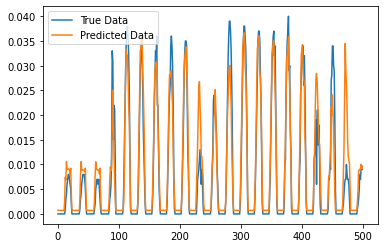

In [ ]:
rf_prediction = np.array(rf_prediction)
rf_prediction[rf_prediction < 0] = 0
rf_prediction = rf_prediction.tolist()
plt.plot(y_val[:500], label='True Data')
plt.plot(rf_prediction[:500], label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
depth_list=[5,8,9,10,11,12]
n_estimators_list = [104,24,25,26,27]

r2_lgbm_list=[]
rmse_lgbm_list = []

for depth_i in depth_list:
  for n_estimators_i in n_estimators_list: 
    rf_reg_lgbm=LGBMRegressor(n_estimators = n_estimators_i, max_depth=depth_i,learning_rate=0.7)
    rf_reg_lgbm.fit(np.asarray(X_train_scaled),np.asarray(y_train))

    y_pred=rf_reg_lgbm.predict(X_val_scaled)
    r2_rf_lgbm=r2_score(y_val,y_pred)
    rmse_rf_lgbm=mean_squared_error(y_val,y_pred,squared=False)

    r2_lgbm_list.append(r2_rf_lgbm)
    rmse_lgbm_list.append(rmse_rf_lgbm)

    print('RMSE at depth {} and number of estimators {}: {:.3f}'.format(depth_i,n_estimators_i, rmse_rf_lgbm))
    print('R2 at depth {} and number of estimators {}: {:.3%}'.format(depth_i,n_estimators_i, r2_rf_lgbm))

RMSE at depth 5 and number of estimators 104: 0.005
R2 at depth 5 and number of estimators 104: 91.397%
RMSE at depth 5 and number of estimators 24: 0.005
R2 at depth 5 and number of estimators 24: 91.612%
RMSE at depth 5 and number of estimators 25: 0.005
R2 at depth 5 and number of estimators 25: 91.753%
RMSE at depth 5 and number of estimators 26: 0.005
R2 at depth 5 and number of estimators 26: 91.748%
RMSE at depth 5 and number of estimators 27: 0.005
R2 at depth 5 and number of estimators 27: 91.727%
RMSE at depth 8 and number of estimators 104: 0.005
R2 at depth 8 and number of estimators 104: 91.421%
RMSE at depth 8 and number of estimators 24: 0.004
R2 at depth 8 and number of estimators 24: 92.130%
RMSE at depth 8 and number of estimators 25: 0.004
R2 at depth 8 and number of estimators 25: 92.131%
RMSE at depth 8 and number of estimators 26: 0.004
R2 at depth 8 and number of estimators 26: 91.991%
RMSE at depth 8 and number of estimators 27: 0.004
R2 at depth 8 and number of

In [ ]:
best_R2_index=np.argmax(r2_lgbm_list) 
max_R2_rf_lgbm=np.max(r2_lgbm_list)
best_rmse_index=np.argmin(rmse_lgbm_list) 
max_rmse_rf_lgbm=np.min(rmse_lgbm_list)
best_R2_index_depth = int(best_R2_index/5) 
best_depth_rf_lgbm=depth_list[best_R2_index_depth]
i = 4
while best_R2_index-i > 4: 
  i = i*2
best_estimators_rf_lgbm=n_estimators_list[best_R2_index-i]
print('Best depth and number of estimators for decision tree are {} and {} with R2: {:.3%} and RMSE: {}'.format(best_depth_rf_lgbm, best_estimators_rf_lgbm,max_R2_rf_lgbm,max_rmse_rf_lgbm))

Best depth and number of estimators for decision tree are 9 and 26 with R2: 92.131% and RMSE: 0.0044412606556636005


##Neural Networks

Same with neural networks.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_MLP(X):
  model = Sequential()
  #Input layer
  model.add(Dense(1, input_shape=(X.shape[1],)))
  #Hidden layers
  model.add(Dense(20, activation='tanh'))
  #Output layer
  model.add(Dense(1, activation = 'linear'))
  model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.015))
  
  return model

In [ ]:
model = create_MLP(X_train_scaled)
es = EarlyStopping(monitor='loss', mode="min", verbose = 1, patience = 200)
mc = ModelCheckpoint(filepath='temp.h5',save_weights_only=True,verbose=1,monitor='loss',mode='min',save_best_only=True)
history=model.fit(X_train_scaled, y_train, epochs=10, validation_data=[X_val_scaled,y_val], verbose=1, batch_size=100, callbacks=[es,mc])

Epoch 1/10
3530/3531 [============================>.] - ETA: 0s - loss: 1.2058e-04
Epoch 1: loss improved from inf to 0.00012, saving model to temp.h5
3531/3531 [==============================] - 8s 2ms/step - loss: 1.2058e-04 - val_loss: 6.9194e-05
Epoch 2/10
3511/3531 [============================>.] - ETA: 0s - loss: 5.6178e-05
Epoch 2: loss improved from 0.00012 to 0.00006, saving model to temp.h5
3531/3531 [==============================] - 6s 2ms/step - loss: 5.6152e-05 - val_loss: 4.6176e-05
Epoch 3/10
3497/3531 [============================>.] - ETA: 0s - loss: 5.2080e-05
Epoch 3: loss improved from 0.00006 to 0.00005, saving model to temp.h5
3531/3531 [==============================] - 8s 2ms/step - loss: 5.2085e-05 - val_loss: 7.5806e-05
Epoch 4/10
3493/3531 [============================>.] - ETA: 0s - loss: 5.1968e-05
Epoch 4: loss improved from 0.00005 to 0.00005, saving model to temp.h5
3531/3531 [==============================] - 6s 2ms/step - loss: 5.2049e-05 - val_loss:

4413/4413 [==============================] - 4s 1ms/step


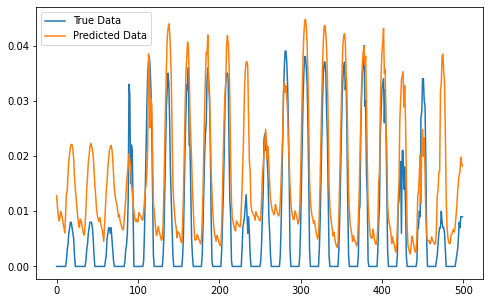

In [ ]:
rf_prediction=model.predict(X_val_scaled)
rf_prediction = np.array(rf_prediction)
rf_prediction[rf_prediction < 0] = 0
rf_prediction = rf_prediction.tolist()
plt.figure(figsize=[8,5])
plt.plot(y_val[:500], label='True Data')
plt.plot(rf_prediction[:500], label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
nn_r2=r2_score(y_val,rf_prediction)
print('R-squared:{:.3%}'.format(nn_r2))
nn_RMSE=mean_squared_error(y_val,rf_prediction,squared=False)
print('RMSE:{:.3f}'.format(nn_RMSE))

R-squared:74.299%
RMSE:0.008


##LSMT

Same with but we used a LSMT (Long Short-Term Memory) that is a type of recurrent neural network (RNN) that is particularly effective at handling sequences of data over time.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
def create_LSTM(X):
  model = Sequential()
  #Input layer
  model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
  #Output layer
  model.add(Dense(1, activation = 'linear'))
  model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.015))
  
  return model

In [ ]:
X_train_reshaped = np.reshape(X_train_scaled.values, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_scaled_reshaped = np.reshape(X_val_scaled.values, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

In [ ]:
model = create_LSTM(X_train_reshaped)
es = EarlyStopping(monitor='loss', mode="min", verbose = 1, patience = 200)
mc = ModelCheckpoint(filepath='temp.h5',save_weights_only=True,verbose=1,monitor='loss',mode='min',save_best_only=True)
history=model.fit(X_train_reshaped, y_train, epochs=10, validation_data=[X_val_scaled_reshaped,y_val], verbose=1, batch_size=100, callbacks=[es,mc])

Epoch 1/10
3520/3531 [============================>.] - ETA: 0s - loss: 5.1041e-05
Epoch 1: loss improved from inf to 0.00005, saving model to temp.h5
3531/3531 [==============================] - 15s 4ms/step - loss: 5.0957e-05 - val_loss: 2.1553e-05
Epoch 2/10
3512/3531 [============================>.] - ETA: 0s - loss: 2.0454e-05
Epoch 2: loss improved from 0.00005 to 0.00002, saving model to temp.h5
3531/3531 [==============================] - 12s 3ms/step - loss: 2.0442e-05 - val_loss: 2.4135e-05
Epoch 3/10
3527/3531 [============================>.] - ETA: 0s - loss: 1.8281e-05
Epoch 3: loss improved from 0.00002 to 0.00002, saving model to temp.h5
3531/3531 [==============================] - 14s 4ms/step - loss: 1.8276e-05 - val_loss: 2.0107e-05
Epoch 4/10
3521/3531 [============================>.] - ETA: 0s - loss: 1.7409e-05
Epoch 4: loss improved from 0.00002 to 0.00002, saving model to temp.h5
3531/3531 [==============================] - 13s 4ms/step - loss: 1.7404e-05 - val_l

4413/4413 [==============================] - 6s 1ms/step


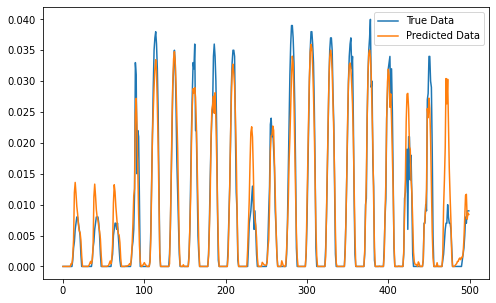

In [ ]:
rf_prediction=model.predict(X_val_scaled_reshaped)
rf_prediction = np.array(rf_prediction)
rf_prediction[rf_prediction < 0] = 0
rf_prediction = rf_prediction.tolist()
plt.figure(figsize=[8,5])
plt.plot(y_val[:500], label='True Data')
plt.plot(rf_prediction[:500], label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
nn_r2_2=r2_score(y_val,rf_prediction)
print('R-squared:{:.3%}'.format(nn_r2_2))
nn_RMSE_2=mean_squared_error(y_val,rf_prediction,squared=False)
print('RMSE:{:.3f}'.format(nn_RMSE_2))

R-squared:93.823%
RMSE:0.004


In [ ]:
R2_models = pd.DataFrame([linear_r2 * 100,max_R2_ridge * 100, max_R2_lasso * 100, max_R2_elasticnet*100, max_R2_decision_tree * 100, max_R2_rf * 100, max_R2_knn*100, svr_r2*100,max_R2_rf_reg*100,max_R2_rf_lgbm*100,nn_r2*100,nn_r2_2*100], columns = ['R2_score'], index = ['Linear','Ridge','Lasso','Elasticnet','Decision Tree', 'Random forest','KNN','SVR','XGB','LGBM','MLP','LSMT'])

We take all the best R2 that we have. We can see that the best is the one who is the closest to 100%. We can see that the best model seems to be KNN with the hyperparameters that we found with it. 

In [ ]:
R2_models.T

,Linear,Ridge,Lasso,Elasticnet,Decision Tree,Random forest,KNN,SVR,XGB,LGBM,MLP,LSMT
R2_score,82.104109,82.10413,82.124997,82.124997,91.514425,94.527601,95.428411,-257.974157,94.305512,92.130985,74.29893,93.822999


In [ ]:
R2_models.max()

R2_score    95.428411
dtype: float64

The maximum seems to be for the KNN with the hyperparameters that we found previously which means n_neightbors = 7 and n_distance = 1. (Euclidean distance) 

# Best model with hyperparameters

We test our best model with test data and we see the different results. 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3, p=1)
knn.fit(X_train_scaled,y_train)

y_pred=knn.predict(X_test_scaled)

In [ ]:
pd.DataFrame([y_pred, y_test], index = ['Prediction', 'True value']).T

,Prediction,True value
0,0.000,0.004
1,0.000,0.004
2,0.000,0.004
3,0.003,0.004
4,0.000,0.004
...,...,...
59371,0.005,0.000
59372,0.000,0.000
59373,0.000,0.000
59374,0.000,0.000


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
rf_r2=r2_score(y_test,y_pred)
print('R-squared:{:.3%}'.format(rf_r2))
rf_RMSE=mean_squared_error(y_test,y_pred,squared=False)
print('RMSE:{:.3f}'.format(rf_RMSE))

R-squared:45.249%
RMSE:0.009


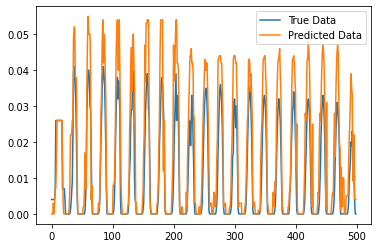

In [ ]:
y_pred = np.array(y_pred)
y_pred[y_pred < 0] = 0
y_pred = y_pred.tolist()
plt.plot(y_test[:500], label='True Data')
plt.plot(y_pred[:500], label='Predicted Data')
plt.legend()
plt.show()

There might be an error here when finding hyperparameters as we can see that if we take a higher number of neighbors, we get better results. For example : 

In [ ]:
knn=KNeighborsRegressor(n_neighbors=100, p=1)
knn.fit(X_train_scaled,y_train)

y_pred=knn.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score
rf_r2=r2_score(y_test,y_pred)
print('R-squared:{:.3%}'.format(rf_r2))
rf_RMSE=mean_squared_error(y_test,y_pred,squared=False)
print('RMSE:{:.3f}'.format(rf_RMSE))

R-squared:61.904%
RMSE:0.007


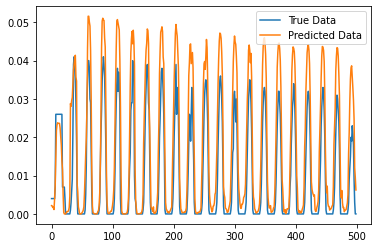

In [ ]:
y_pred = np.array(y_pred)
y_pred[y_pred < 0] = 0
y_pred = y_pred.tolist()
plt.plot(y_test[:500], label='True Data')
plt.plot(y_pred[:500], label='Predicted Data')
plt.legend()
plt.show()

It is seems like the higher the number of neighbors is, the better the values are predicted. I don't really know where the results come from and why it is so different, even after trying different hyperparameters, the number 3 for neighbors seems to be the best hyperparameter. It might be coming from the fact that we have overfitting. We might be taking less features or splitting more our data from the begining. 

This part shows that we might be having an issue, which might be an overfitting. 

# Trying the second model : XGB

In [ ]:
rf_reg=XGBRegressor(max_depth=12,n_estimators=24)
rf_reg.fit(X_train_scaled,y_train)

rf_prediction=rf_reg.predict(X_test_scaled)

In [ ]:
xgb_r2=r2_score(y_test,rf_prediction)
print('R-squared:{:.3%}'.format(xgb_r2))
xgb_RMSE=mean_squared_error(y_test,rf_prediction,squared=False)
print('RMSE:{:.3f}'.format(xgb_RMSE))

R-squared:45.939%
RMSE:0.008
